In [1]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
set(df[4])

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [3]:
import rel_imports

In [4]:
from utils import remove_duplicates
from collections import Counter

print(remove_duplicates(df[4]))

print(Counter(df[4]))

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[:, 4].values
y = np.where(y == 'Iris-virginica', 0, 1)


df[5] = y

print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


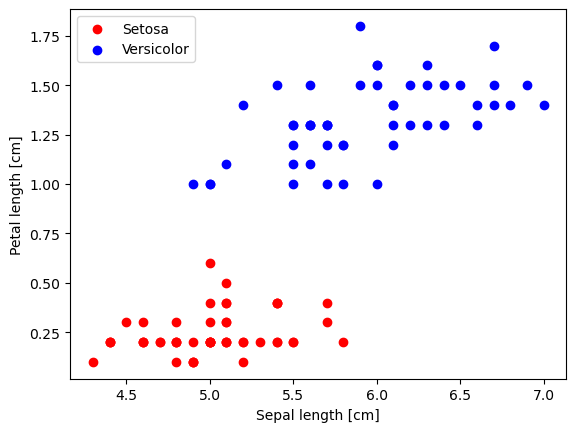

In [27]:
# extract sepal length and petal length
rel_df = df[df[5] == 1]#[[0, 2]]#.values
feature_cols = [0, 3]
X = rel_df[feature_cols].values
y = np.where(rel_df[4] == 'Iris-setosa', 0, 1)

# plot data
plt.scatter(rel_df[rel_df[4] == 'Iris-setosa'][feature_cols[0]], 
            rel_df[rel_df[4] == 'Iris-setosa'][feature_cols[1]],
            color='red', marker='o', label='Setosa')
plt.scatter(rel_df[rel_df[4] == 'Iris-versicolor'][feature_cols[0]], 
            rel_df[rel_df[4] == 'Iris-versicolor'][feature_cols[1]],
            color='blue', marker='o', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

[ 0.00394345 -0.00551756]
[ 0.00584345 -0.00431756]
[ 0.00774345 -0.00311756]
[ 0.00474345 -0.00211756]
[ 0.00664345 -0.00091756]
[3.64345364e-03 8.24358635e-05]
[0.00554345 0.00128244]
[0.00744345 0.00248244]
[0.00444345 0.00348244]
[0.00634345 0.00468244]
[0.00324345 0.00568244]
[0.00514345 0.00688244]
[0.00494345 0.00768244]
[0.00474345 0.00848244]
[0.00454345 0.00928244]
[0.00434345 0.01008244]
[0.00414345 0.01088244]
[0.00394345 0.01168244]
[0.00584345 0.01288244]
[0.00234345 0.01368244]
[0.00424345 0.01488244]
[-0.00085655  0.01468244]
[-0.00085655  0.01468244]
[-0.00085655  0.01468244]
[-0.00085655  0.01468244]
[-0.00085655  0.01468244]
[-0.00085655  0.01468244]
[-0.00085655  0.01468244]
[-0.00085655  0.01468244]
[-0.00085655  0.01468244]
[-0.00085655  0.01468244]
[-0.00085655  0.01468244]
[-0.00085655  0.01468244]
[-0.00085655  0.01468244]
[-0.00085655  0.01468244]
[-0.00085655  0.01468244]
[-0.00085655  0.01468244]
[-0.00085655  0.01468244]
[-0.00085655  0.01468244]
[-0.000856

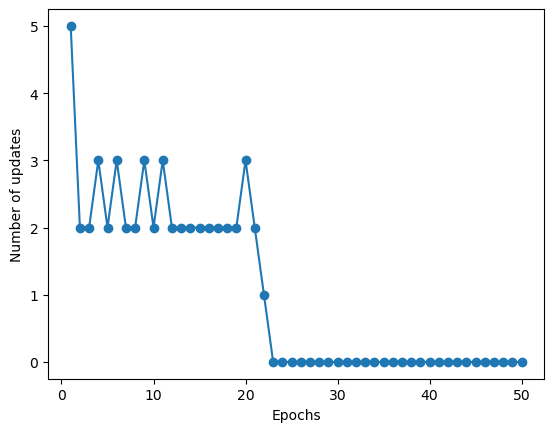

In [28]:
from Perceptron import Perceptron

ppn = Perceptron(lr=0.001, n_iter=50)

ppn.fit(X, y)

plt.plot(range(1, len(ppn._errors) + 1), ppn._errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [29]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

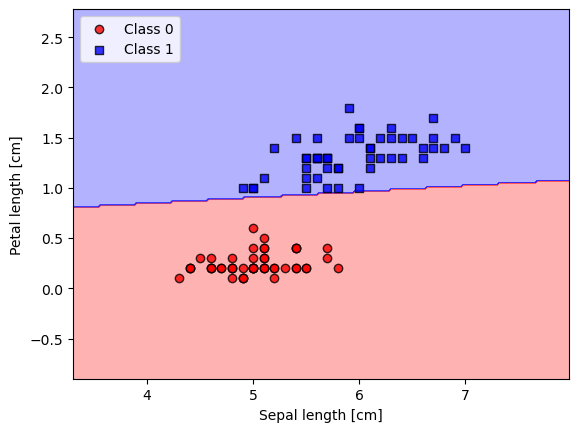

In [30]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')


#plt.savefig('images/02_08.png', dpi=300)
plt.show()